In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
# Define a simple neural network
# 2 linear layers with 100 and 1 neurons. The input size is 5 and the output size is 1
# Use Relu in between the layers and sigmoi as output activation function

class SimpleModel(nn.Module):
    def __init__(self, initializer):
        super(SimpleModel, self).__init__()

        # Couches linéaires
        self.fc1 = nn.Linear(5, 100)  # Couche 1 : 5 entrées, 100 neurones
        self.fc2 = nn.Linear(100, 1)  # Couche 2 : 100 neurones, 1 sortie

        # Appliquer l'initialiseur personnalisé
        initializer(self.fc1.weight)
        initializer(self.fc2.weight)

        # Apply the initializer
        initializer(self.fc1.weight)
        initializer(self.fc2.weight)

    def forward(self, x):

        # Appliquer ReLU après la première couche linéaire
        x = torch.relu(self.fc1(x))

        # Appliquer la deuxième couche linéaire, puis Sigmoid pour la sortie
        x = torch.sigmoid(self.fc2(x))
        return x

In [ ]:
# Custom initializers
def random_normal_initializer(mean, std):
    def initializer(tensor):
        nn.init.normal_(tensor, mean=mean, std=std)
    return initializer

def glorot_normal_initializer():
    def initializer(tensor):
        nn.init.xavier_normal_(tensor)
    return initializer

In [ ]:
# Function to train the model and visualize gradients
def train_and_visualize_gradients(initializer, title):

# Define the model with the provided initializer
    class SimpleModel(nn.Module):
        def __init__(self, initializer):
            super(SimpleModel, self).__init__()
            self.fc1 = nn.Linear(5, 100)  # First layer with 5 input features and 100 neurons
            self.fc2 = nn.Linear(100, 1)  # Second layer with 100 input neurons and 1 output neuron

            # Apply the initializer to the weights
            initializer(self.fc1.weight)
            initializer(self.fc2.weight)

        def forward(self, x):
            x = torch.relu(self.fc1(x))  # Apply ReLU activation to the first layer
            x = torch.sigmoid(self.fc2(x))  # Apply Sigmoid activation to the output layer
            return x

    # Initialize the model
    model = SimpleModel(initializer)

    # Define optimizer and loss function
    optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent with learning rate 0.1
    criterion = nn.BCELoss()  # Binary Cross Entropy loss function

    # Generate dummy data
    X = torch.randn(1000, 5)
    y = torch.randint(0, 2, (1000,)).float()

    # Training loop
    loss_history = []
    grad_history = []
    for epoch in tqdm(range(10)):
        model.train()
        optimizer.zero_grad()
        outputs = model(X).squeeze()
        loss = criterion(outputs, y)
        loss.backward()

        # Collect mean gradient magnitude
        mean_grad = torch.mean(torch.stack([
            torch.mean(param.grad.abs()) for param in model.parameters() if param.grad is not None
        ]))
        grad_history.append(mean_grad.item())

        optimizer.step()
        loss_history.append(loss.item())

    print('loss_history:', loss_history)

    # Visualize loss history
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label='Loss')
    plt.title(f'{title} - Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Visualize gradients history
    plt.subplot(1, 2, 2)
    plt.plot(grad_history, label='Mean Gradient Magnitude', color='red')
    plt.title(f'{title} - Gradients History')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Gradient Magnitude')
    plt.legend()

    plt.tight_layout()
    plt.show()


100%|██████████| 10/10 [00:00<00:00, 135.98it/s]


loss_history: [31.166173934936523, 31.166173934936523, 31.166173934936523, 31.166170120239258, 31.16617202758789, 31.16617202758789, 31.166168212890625, 31.16617202758789, 31.166175842285156, 31.166168212890625]


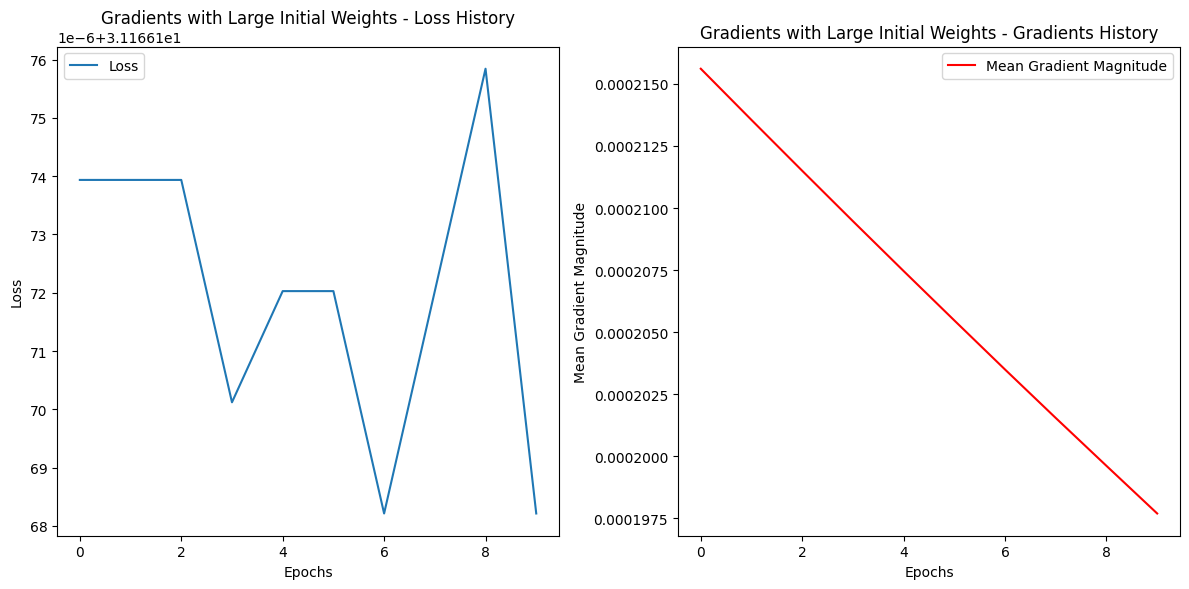

In [ ]:
# Visualize gradients with large initial weights
train_and_visualize_gradients(random_normal_initializer(mean=1000.0, std=100.0), 'Gradients with Large Initial Weights')

100%|██████████| 10/10 [00:00<00:00, 633.24it/s]


loss_history: [0.6994343400001526, 0.6983870267868042, 0.6975330710411072, 0.6968231797218323, 0.6962230205535889, 0.6957078576087952, 0.6952579617500305, 0.6948587894439697, 0.6944997906684875, 0.6941750645637512]


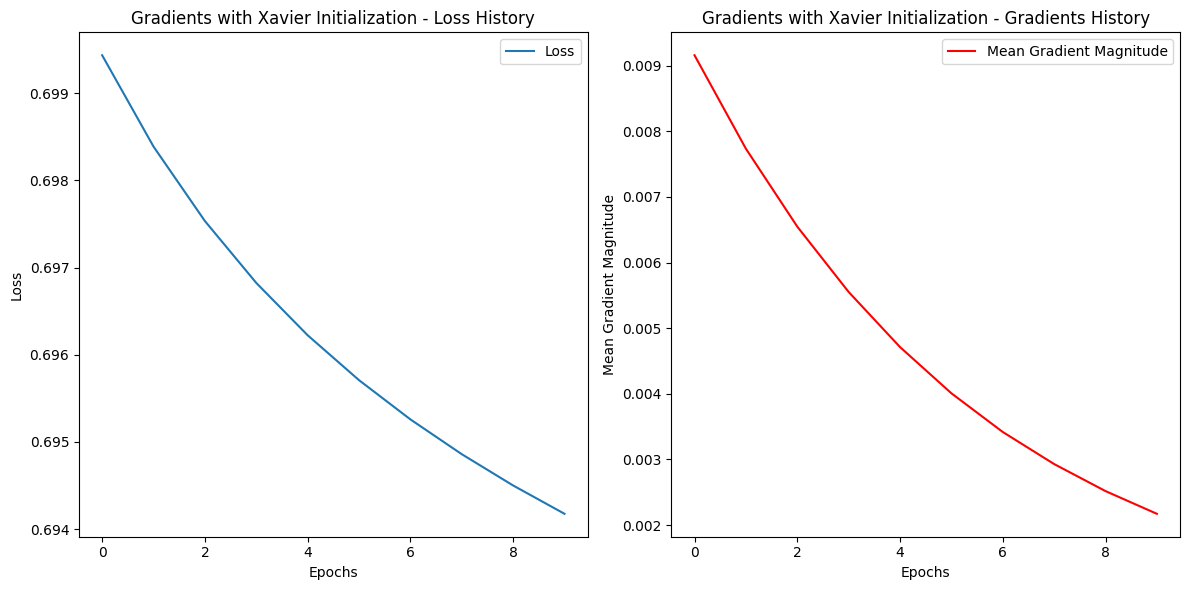

In [ ]:
# Visualize gradients with good initialization (Xavier)
train_and_visualize_gradients(glorot_normal_initializer(), 'Gradients with Xavier Initialization')